# Decision Tree Regression

Adapted from http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

A 1D regression with decision tree.

The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.

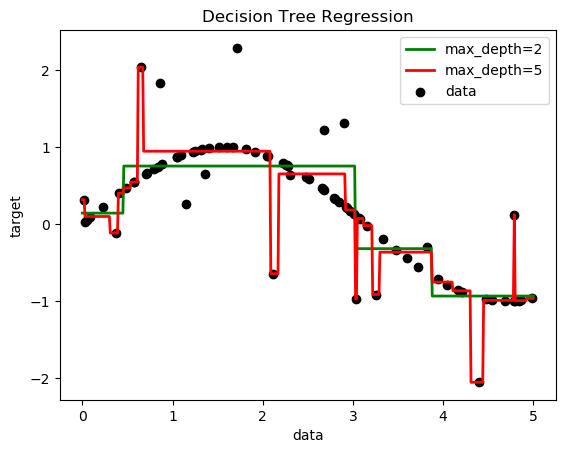

In [1]:
using ScikitLearn

# Import the necessary modules and libraries
@sk_import tree: DecisionTreeRegressor
using PyPlot

# Create a random dataset
srand(42)
X = sort(5 * rand(80))
XX = reshape(X, 80, 1)
y = sin.(X)  # for 0.5/0.6 compat. Use sin.(X)
y[1:5:end] += 3 * (0.5 - rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
fit!(regr_1, XX, y)
fit!(regr_2, XX, y)

# Predict
X_test = 0:0.01:5.0
y_1 = predict(regr_1, reshape(X_test, length(X_test), 1))
y_2 = predict(regr_2, reshape(X_test, length(X_test), 1))

# Plot the results
scatter(X, y, c="k", label="data")
plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
xlabel("data")
ylabel("target")
title("Decision Tree Regression")
legend()
show()